In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(ride_data,city_data, on=['city'], how='left')
#merged_data = city_data.merge(ride_data, on='city')
# Display the data table for preview
all_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

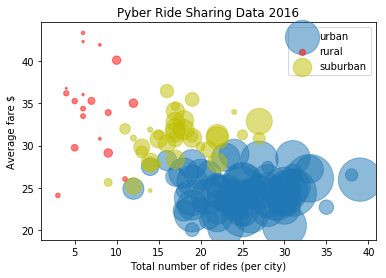

In [2]:
# split up the city types into their own variables
city_types = all_data.groupby('type')
urban = city_types.get_group('Urban')
rural = city_types.get_group('Rural')
suburban = city_types.get_group('Suburban')

#calculate the different datapoints for the scatter plot
urban_total_rides = urban.groupby('city')['ride_id'].count()
urban_average_fare = urban.groupby('city')['fare'].mean()
urban_total_drivers = urban.groupby('city')['driver_count'].sum()

rural_total_rides = rural.groupby('city')['ride_id'].count()
rural_average_fare = rural.groupby('city')['fare'].mean()
rural_total_drivers = rural.groupby('city')['driver_count'].sum()

suburban_total_rides = suburban.groupby('city')['ride_id'].count()
suburban_average_fare = suburban.groupby('city')['fare'].mean()
suburban_total_drivers = suburban.groupby('city')['driver_count'].sum()


# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.scatter(urban_total_rides,urban_average_fare, urban_total_drivers, alpha=0.5, label='urban')
plt.scatter(rural_total_rides,rural_average_fare, rural_total_drivers, c='r', alpha = 0.5, label ='rural')
plt.scatter(suburban_total_rides,suburban_average_fare, suburban_total_drivers, c='y', alpha = 0.5,label='suburban')
# Create a legend

plt.title('Pyber Ride Sharing Data 2016')
plt.xlabel('Total number of rides (per city)')
plt.ylabel('Average fare $')
plt.legend()
plt.show()
# Incorporate a text label regarding circle size

# Save Figure

## Total Fares by City Type

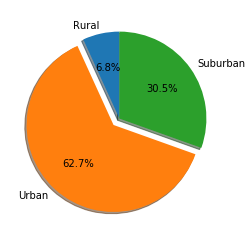

In [3]:

total_fares = city_types['fare'].sum()
# Calculate Type Percents
per_rural = total_fares['Rural'] / total_fares.sum() * 100
per_urban = total_fares['Urban'] / total_fares.sum() * 100
per_suburban = total_fares['Suburban'] / total_fares.sum() * 100
# Build Pie Chart
labels = 'Rural', 'Urban', 'Suburban'
sizes = [per_rural, per_urban, per_suburban]
explode = (0, 0.1, 0)
plt.pie(sizes, labels=labels, explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()
# Save Figure

## Total Rides by City Type

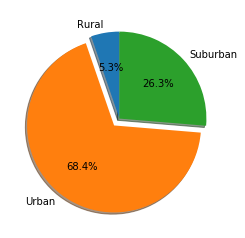

In [4]:
# Calculate Ride Percents
total_rides = city_types['ride_id'].count().sum()
rural_ride_per = rural_total_rides.sum() / total_rides
urban_ride_per = urban_total_rides.sum() / total_rides
suburban_ride_per = suburban_total_rides.sum() / total_rides
# Build Pie Chart


# Build Pie Chart
labels = 'Rural', 'Urban', 'Suburban'
sizes = [rural_ride_per, urban_ride_per, suburban_ride_per]
explode = (0, 0.1, 0)
plt.pie(sizes, labels=labels, explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()
# Save Figure

## Total Drivers by City Type

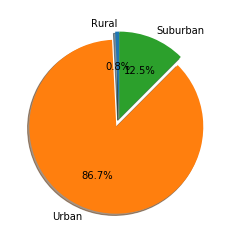

In [5]:
# Calculate Driver Percents
total_drivers = city_types['driver_count'].sum().sum()

rural_drivers_per = city_types['driver_count'].sum()[0] / total_drivers * 100
urban_drivers_per = city_types['driver_count'].sum()[2] / total_drivers * 100
suburban_drivers_per = city_types['driver_count'].sum()[1] / total_drivers * 100


#Build Pie Charts
driver_sizes = [rural_drivers_per, urban_drivers_per, suburban_drivers_per]
plt.pie(driver_sizes,labels = labels, explode = explode,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()